![imagen](../Data/imagen.jpg)

**<center><H1>ANÁLISIS EXPLORATORIO DE DATOS (EDA)<H1></center>**

## LIBRERIAS A UTILIZAR

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option("display.max_columns", None)

In [132]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## INDICE

- [**1. TÍTULO**](#1.TÍTULO)  
- [**2. PRIMERA HIPOTESIS**](#2.PRIMERA-HIPÓTESIS)  
- [**3. IMPORTACION DE DATOS**](#3.IMPORTACIÓN-DE-DATOS)  

    - [**3.1. Carga del DataSet "edc"**](##3.1.Carga-del-DataSet-"edc")  
    - [**3.2. Carga del DataSet "vec"**](##3.2.Carga-del-DataSet-"vec")  

- [**4. EXPLORACIÓN INICIAL**](#4.Exploración-Inicial)  

    -  [**4.1. Información general del DataSet "edc"**](#4.1.Información-general-del-DataSet-"edc")  
    -  [**4.2. Información general del DataSet "vec"**](#4.2.Información-general-del-DataSet-"vec")  

- [**5. LIMPIEZA DE LOS DATASETS**](#5.Limpieza-de-los-DataSets) 

- [**6. ANALISIS DE DATOS**](#6.Análisis-de-datos) 
    
    - [**6.1 Univariante**](#6.1.Univariante)
    - [**6.2 Bivariante**](#6.2.Bivariante)
    - [**6.3 Multivariante**](#6.3.Multivariante)

## 1. TÍTULO

*<h3>Exploración y análisis de la correlacion entre la valuacion economica de los mejores clubes europeos de futbol y su desempeño deportivo en la temporada 2020-2021<h3>*

## 2. PRIMERA HIPÓTESIS

Los equipos de futbol de las ligas europeas mas importantes que obtienen mejor rendimiento deportivo son los que están mejor valuados en el mercado. 

## 3. IMPORTACIÓN DE DATOS

Los archivos CSV que continen los DataSet a partir de los cuales se realizará el EDA pertenecen a la plataforma online Kaggle.

| Abreviatura DataSet | Nombre archivo CSV |
| --------- | --------- |
| edc | EDA_estadisticas_deportivas_clubes |
| vec | EDA_valuacion_economica_clubes |

<h3>3.1 Carga de DataSet "edc"<h3>

In [133]:
edc = pd.read_csv("../Data/EDA_estadisticas_deportivas_clubes.csv")
edc.drop("Unnamed: 0", axis=1, inplace=True)

| Nombre columna | Descripción |
| --------- | --------- |
| equipo | Clubes de fútbol europeos de las ligas más importantes |
| liga | Liga correspondiente |
| goles | Cantidad de goles convertidos por cada equipo en dicha temporada |
| tiros_porteria | Número de tiros por partido |
| t_amarillas | Número de tarjetas amarillas recibidas en el torneo |
| t_rojas | Número de tarjetas rojas recibidas en el torneo |
| posesion_% | Porcentaje de posesión |
| pases_% | Porcentaje de pases |
| duelos_aereos_ganados | Duelos aéreos ganados por partido |
| valor_gral_eq | Valoración general del equipo |

<h3>3.2 Carga de DataSet "vec"<h3>

In [134]:
vec = pd.read_csv("../Data/EDA_valuacion_economica_clubes.csv")

| Nombre columna | Descripción |
| --------- | --------- |
| posicion | Ranking de valuacion económica |
| equipo | Club |
| liga | Liga correspondiente |
| tamaño_plantilla | Cantidad de jugadores que tiene en su plantilla cada equipo |
| edad_media_jug | Edad media de los jugadores |
| valor_eq | Valor de mercado del club |
| valor_med_merc_jug |  Valor medio de mercado de los jugadores del club |
| sum_top18_jug | Suma del valor de mercado de los 18 jugadores top de cada club |

## 4. EXPLORACIÓN INICIAL

<h3>4.1 Información general del DataSet "edc"<h3>

Dimensiones del DataFrame:

In [135]:
edc.shape

(98, 10)

Mediante head() y tail() observo las primeras y ultimas 5 filas respectivamente para tener un panorama general de los datos:

In [136]:
edc.head()

,equipo,liga,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,50,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


In [137]:
edc.columns

Index(['equipo', 'liga', 'goles', 'tiros_porteria', 't_amarillas', 't_rojas',
       'posesion_%', 'pases_%', 'duelos_aereos_ganados', 'valor_gral_eq'],
      dtype='object')

In [138]:
edc.tail()

,equipo,liga,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
93,Sheffield United,Premier League,20,8.5,73,3,43.0,76.9,19.1,6.46
94,Crotone,Serie A,45,9.5,85,4,47.2,80.4,12.7,6.43
95,Benevento,Serie A,40,11.0,90,5,44.2,77.7,13.4,6.43
96,Dijon,Ligue 1,25,9.2,75,5,46.9,80.0,14.3,6.42
97,Schalke 04,Bundesliga,25,8.9,70,2,46.2,76.5,15.6,6.41


Tipos de datos, ¿existen valores nulos?

In [139]:
edc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   equipo                 98 non-null     object 
 1   liga                   98 non-null     object 
 2   goles                  98 non-null     int64  
 3   tiros_porteria         98 non-null     float64
 4   t_amarillas            98 non-null     int64  
 5   t_rojas                98 non-null     int64  
 6   posesion_%             98 non-null     float64
 7   pases_%                98 non-null     float64
 8   duelos_aereos_ganados  98 non-null     float64
 9   valor_gral_eq          98 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.8+ KB


In [140]:
edc.dtypes

equipo                    object
liga                      object
goles                      int64
tiros_porteria           float64
t_amarillas                int64
t_rojas                    int64
posesion_%               float64
pases_%                  float64
duelos_aereos_ganados    float64
valor_gral_eq            float64
dtype: object

In [141]:
valores_nulos = edc.isnull().sum()/len(edc)*100
print(valores_nulos)

equipo                   0.0
liga                     0.0
goles                    0.0
tiros_porteria           0.0
t_amarillas              0.0
t_rojas                  0.0
posesion_%               0.0
pases_%                  0.0
duelos_aereos_ganados    0.0
valor_gral_eq            0.0
dtype: float64


¿Existen filas duplicadas?

In [145]:
edc.duplicated().sum()

0

Descripción de parámetros estadísticos:

In [143]:
parametros_estadisticos = edc.describe().round(4)
parametros_estadisticos

,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
count,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000,98.0000
mean,51.6837,11.8510,69.7041,3.3367,49.9959,80.4418,16.0061,6.6461
std,15.7373,2.1497,15.1373,2.1488,4.8901,4.6902,3.0790,0.1321
min,20.0000,7.1000,40.0000,0.0000,38.5000,66.5000,9.5000,6.4100
25%,40.2500,10.3250,60.0000,2.0000,46.2250,78.0250,14.0250,6.5400
50%,50.0000,11.4500,67.5000,3.0000,49.7500,80.8000,16.1000,6.6300
75%,61.0000,13.3500,80.0000,4.7500,52.8500,83.4500,17.8500,6.7300
max,90.0000,17.1000,117.0000,10.0000,62.4000,89.7000,26.8000,7.0100


Información de las columnas que tienen valores tipo "object":

In [146]:
edc.describe(include=object)
# edc.describe(include=object).shape

,equipo,liga
count,98,98
unique,98,5
top,Manchester City,Premier League
freq,1,20


<h3>4.2 Información general del DataSet "vec"<h3>

Dimensiones del DataFrame:

In [147]:
vec.shape

(97, 8)

Panorama general para ver el aspecto de los datos:

In [148]:
vec.head()

,Unnamed: 0,equipo,liga,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug,Market Value Of Top 18 Players In Millions(£)
0,0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,3,Chelsea,Premier League,27,26.9,802.35,29.72,737.10
4,4,Liverpool,Premier League,27,27.2,779.85,28.88,715.95


In [149]:
vec.drop("Unnamed: 0", axis=1, inplace=True)
vec

,equipo,liga,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug,Market Value Of Top 18 Players In Millions(£)
0,Manchester City,Premier League,24,27.1,970.02,40.42,920.70
1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76,801.00
2,Manchester United,Premier League,29,27.9,820.13,28.28,742.50
3,Chelsea,Premier League,27,26.9,802.35,29.72,737.10
4,Liverpool,Premier League,27,27.2,779.85,28.88,715.95
...,...,...,...,...,...,...,...
92,Bordeaux,Ligue 1,30,25.3,89.55,2.99,78.75
93,Levante,LaLiga,27,28.1,89.19,3.30,82.35
94,Metz,Ligue 1,29,25.3,89.19,3.08,79.74
95,Lokomotiv Moscow,Premier Liga,29,25.0,87.32,3.01,77.85


In [150]:
vec.tail()

,equipo,liga,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug,Market Value Of Top 18 Players In Millions(£)
92,Bordeaux,Ligue 1,30,25.3,89.55,2.99,78.75
93,Levante,LaLiga,27,28.1,89.19,3.30,82.35
94,Metz,Ligue 1,29,25.3,89.19,3.08,79.74
95,Lokomotiv Moscow,Premier Liga,29,25.0,87.32,3.01,77.85
96,Genoa,Serie A,34,27.6,86.94,2.56,72.27


Tipos de datos, ¿existen valores nulos?

In [151]:
vec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   equipo                                         97 non-null     object 
 1   liga                                           97 non-null     object 
 2   tamaño_plantilla                               97 non-null     int64  
 3   edad_media_jug                                 97 non-null     float64
 4   valor_eq                                       97 non-null     float64
 5   valor_med_merc_jug                             97 non-null     float64
 6   Market Value Of Top 18 Players In Millions(£)  97 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 5.4+ KB


In [152]:
vec.dtypes

equipo                                            object
liga                                              object
tamaño_plantilla                                   int64
edad_media_jug                                   float64
valor_eq                                         float64
valor_med_merc_jug                               float64
Market Value Of Top 18 Players In Millions(£)    float64
dtype: object

In [153]:
valores_nulos = vec.isnull().sum()/len(vec)*100
print(valores_nulos)

equipo                                           0.0
liga                                             0.0
tamaño_plantilla                                 0.0
edad_media_jug                                   0.0
valor_eq                                         0.0
valor_med_merc_jug                               0.0
Market Value Of Top 18 Players In Millions(£)    0.0
dtype: float64


¿Existen filas duplicadas?

In [154]:
vec.duplicated().sum()

0

Descripción de parámetros estadísticos:

In [155]:
vec.describe().round(4)

,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug,Market Value Of Top 18 Players In Millions(£)
count,97.0000,97.0000,97.0000,97.0000,97.0000
mean,27.7010,26.3268,269.0333,9.8813,248.3166
std,2.8474,1.4194,206.4135,7.7824,191.2185
min,22.0000,23.0000,86.9400,2.5600,72.2700
25%,26.0000,25.5000,119.7000,4.2500,112.0500
50%,27.0000,26.1000,182.7500,7.1100,175.9500
75%,29.0000,27.4000,345.6900,13.2800,324.4500
max,36.0000,30.1000,970.0200,40.4200,920.7000


La media y la mediana tienen casi los mismos valores en cada una de las variables, lo cual indica que la distribución de los datos es normal.

En todos los casos se observa que la desviación estándar es ligeramente menor al rango intercuartil. Esto indica que los datos están mas concentrados y que hay pocos valores atípicos.

Información de las columnas que tienen valores tipo "object":

In [156]:
vec.describe(include=object)

,equipo,liga
count,97,97
unique,97,15
top,Manchester City,Premier League
freq,1,20


En este primer análisis lo que se observa a simple vista es que el DataSet "edc" contiene una dimensión de 98 filas y 10 columnas, mientras que el DataSet "vec" tiene dimensiones muy similares, 97 filas y 8 columnas.

De las diez columnas del DataSet "edc", dos son categóricas (de tipo “object”) y las ocho restantes numéricas (cinco variables de tipo “float64” y las otras tres de tipo “int64”). En el caso del DataSet "vec" nos encontramos con cuatro variables que son de tipo "float64", un "int64" y dos de tipo "object".

Se puede observar que no existen valores nulos en ninguno de los dos DataSet, tampoco filas duplicadas. Si algunos valores outliers que se detectan y tratan a continuación.

De acuerdo a los parámetros estadísticos de las variables tipo object, cada registro de la columnas “equipo” cuenta con un valor único, y en el caso de la columna “liga” que tiene 5 valores únicos de los 98 registros, la liga que aparece con mayor frecuencia (20 veces) es la Premier League.  

## 5. LIMPIEZA DE LOS DATASETS

Renombro las columnas:

In [122]:
edc.rename(columns={'Team': 'equipo', 'Tournament': 'liga','Goals': 'goles', 'Shots pg': 'tiros_porteria',
                    'yellow_cards': 't_amarillas', 'red_cards': 't_rojas', 'Possession%': 'posesion_%',
                      'Pass%': 'pases_%', 'AerialsWon': 'duelos_aereos_ganados', 'Rating': 'valor_gral_eq'}
                      , inplace=True)

In [123]:
vec.rename(columns={'Club Name':'equipo', 'Competition Name':'liga', 
                    'Squad Size':'tamaño_plantilla','Average Age Of Players':'edad_media_jug', 
                    'Market Value Of Club In Millions(£)':'valor_monet_eq',
                    'Average Market Value Of Players In Millions(£)':'valor_med_merc_jug',
                    'Market Value Of Top 18 Players In Millions(£)':'Market Value Of Top 18 Players In Millions(£)'}
                    , inplace=True)

Elimino columna:

In [124]:
vec.drop(columns=["Market Value Of Top 18 Players In Millions(£)"])

,equipo,liga,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug
0,Manchester City,Premier League,24,27.1,970.02,40.42
1,Paris Saint-Germain,Ligue 1,36,26.1,891.18,24.76
2,Manchester United,Premier League,29,27.9,820.13,28.28
3,Chelsea,Premier League,27,26.9,802.35,29.72
4,Liverpool,Premier League,27,27.2,779.85,28.88
...,...,...,...,...,...,...
92,Bordeaux,Ligue 1,30,25.3,89.55,2.99
93,Levante,LaLiga,27,28.1,89.19,3.30
94,Metz,Ligue 1,29,25.3,89.19,3.08
95,Lokomotiv Moscow,Premier Liga,29,25.0,87.32,3.01


¿Existen outliers en el DataFrame? ¿Qué variables presentan outliers? ¿Cómo es la dispersion de los datos?

C:\Users\feder\AppData\Local\Temp\ipykernel_78412\1120718528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(edc['goles'], hist = False)


<Axes: xlabel='goles', ylabel='Density'>

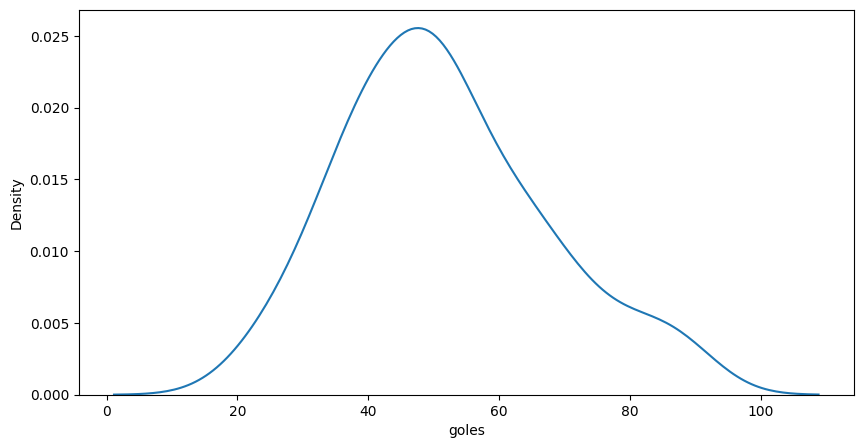

In [126]:
plt.figure(figsize=(10,5))
sns.distplot(edc['goles'], hist = False)

<Axes: xlabel='goles', ylabel='Count'>

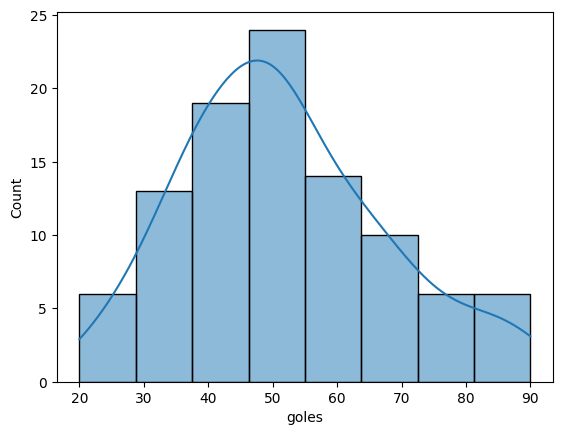

In [180]:
sns.histplot(edc["goles"], kde=True)

C:\Users\feder\AppData\Local\Temp\ipykernel_78412\941016633.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(edc, shade=True, color='blue', label='Densidad de probabilidad')


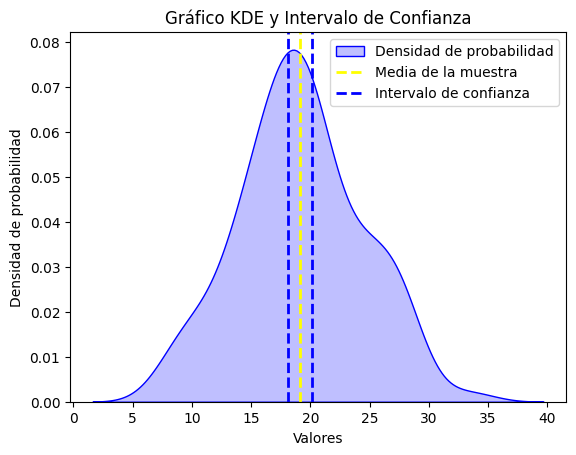

In [127]:
np.random.seed(14)
edc = np.random.normal(loc=20, scale=5, size=100)

# Intervalo de confianza para la media (95%):
intervalo_confianza = stats.norm.interval(0.95, loc=np.mean(edc), scale=stats.sem(edc))

# Gráfico KDE de los datos
sns.kdeplot(edc, shade=True, color='blue', label='Densidad de probabilidad')

media = np.mean(edc)
plt.axvline(media, color='yellow', linestyle='dashed', linewidth=2, label='Media de la muestra')
plt.axvline(intervalo_confianza[0], color='blue', linestyle='dashed', linewidth=2, label='Intervalo de confianza')
plt.axvline(intervalo_confianza[1], color='blue', linestyle='dashed', linewidth=2)

plt.xlabel('Valores')
plt.ylabel('Densidad de probabilidad')
plt.title('Gráfico KDE y Intervalo de Confianza')
plt.legend()

plt.show()

Como se observa en los tres graficos anteriores, la distribución tiende a ser normal y la gráfica leptocúrtica. Existen pocos valores Outliers, los cuales se tratan a continuación.

C:\Users\feder\AppData\Local\Temp\ipykernel_78412\2350758437.py:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  edc.at[1,"goles"] = moda_goles


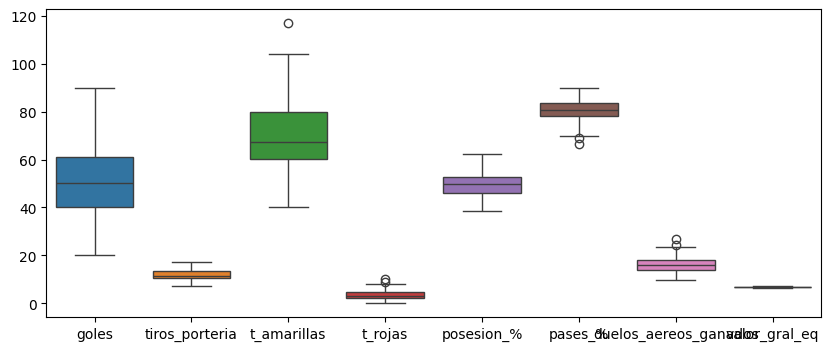

In [184]:
plt.figure(figsize=(10,4))
sns.boxplot(data=edc)

# Calculo del rango intercuartílico
Q1 = edc['goles'].quantile(0.25)
Q3 = edc['goles'].quantile(0.75)
IQR = Q3 - Q1

# Calculo de los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificación de outliers
outliers_goles = edc[(edc['goles'] < limite_inferior) | (edc['goles'] > limite_superior)]
outliers_goles

'''En esta variable al único valor outlier encontrado lo reemplazo por la moda.'''
moda_goles = edc["goles"].mode()
moda_goles
edc.at[1,"goles"] = moda_goles

C:\Users\feder\AppData\Local\Temp\ipykernel_78412\461192024.py:26: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  edc.at[89,"t_amarillas"] = moda_t_amarillas


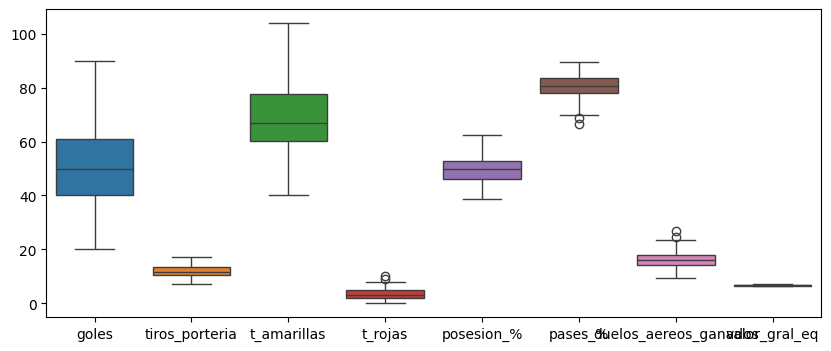

In [193]:
plt.figure(figsize=(10,4))
sns.boxplot(data=edc)

# Calculo del rango intercuartílico
Q1 = edc['t_amarillas'].quantile(0.25)
Q3 = edc['t_amarillas'].quantile(0.75)
IQR = Q3 - Q1

# Calculo de los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_t_amarillas = edc[(edc['t_amarillas'] < limite_inferior) | (edc['t_amarillas'] > limite_superior)]
outliers_t_amarillas

'''En esta variable al único valor outlier encontrado también lo reemplazo por la moda.'''
moda_t_amarillas = edc["t_amarillas"].mode()
moda_t_amarillas
edc.at[89,"t_amarillas"] = moda_t_amarillas

In [195]:
'''
Respecto a los outliers de la variable tarjetas rojas no se realiza ningún tipo de modificación. 
En comparación a las tarjetas amarillas se reciben menos por temporada, sumado a que es muy corta la
brecha entre máximo y mínimo de tarjetas recibidas, lo cual hace que haya menor variación entre 
las observaciones.
'''
#plt.figure(figsize=(10,4))
#sns.boxplot(data=edc)

# Calculo del rango intercuartílico
Q1 = edc['t_rojas'].quantile(0.25)
Q3 = edc['t_rojas'].quantile(0.75)
IQR = Q3 - Q1

# Calculo de los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers_t_rojas = edc[(edc['t_rojas'] < limite_inferior) | (edc['t_rojas'] > limite_superior)]
outliers_t_rojas

,equipo,liga,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
20,Lyon,Ligue 1,81,16.1,60,10,53.6,84.7,14.3,6.80
45,Marseille,Ligue 1,54,10.0,94,9,52.4,82.0,14.9,6.63


Se guardan los DataFrames:

In [160]:
edc.to_csv("../Data/EDA_estadisticas_deportivas_clubes.csv")

In [161]:
vec.to_csv("../Data/EDA_valuacion_economica_clubes.csv")

## 6. ANÁLISIS DE DATOS

<h3>6.1 Univariante<h3>

Mediante un Histograma se puede ver si las variables/columnas tienden a una distribución normal:

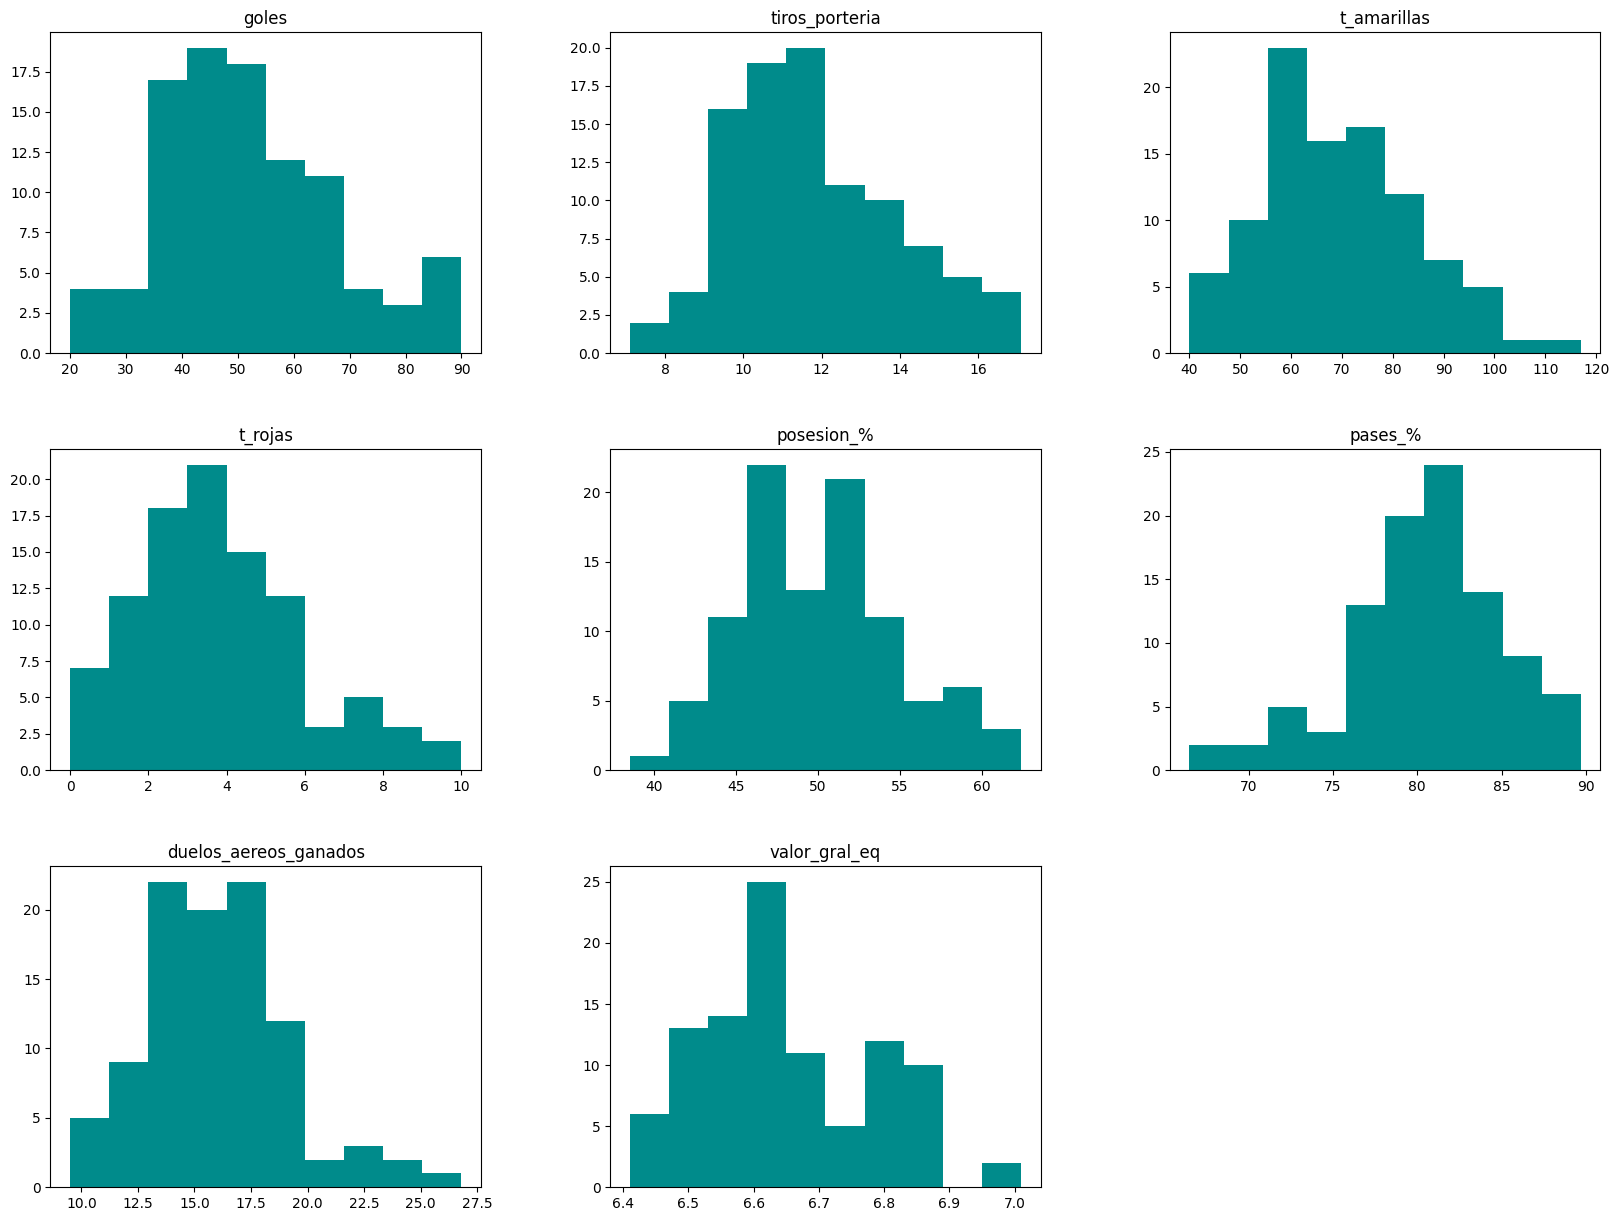

In [ ]:
azul = "#008B8B"
edc.hist(figsize=(20,15), grid=False, color=azul);

Se denota cierta tendencia a la normalidad en cada una de las variables, con una leve asimetría positiva en todas las graficas excepto la correspondiente a la columna de pases_% que tiene asimetría negativa.

<h3>6.2 Bivariante<h3>

**Hipótesis 2:**

**Ho:** No existe una relación directamente proporcional entre cantidad promedio de tiros a porteria por temporada con la cantidad de goles marcados en el torneo por cada equipo.

**H1:** Los equipos que en promedio patearon mayor cantidad de veces a porteria por partido en dicha temporada marcaron mayor cantidad de goles en el torneo. 

In [ ]:
edc[["equipo","tiros_porteria","goles"]]

,equipo,tiros_porteria,goles
0,Manchester City,15.8,83
1,Bayern Munich,17.1,50
2,Paris Saint-Germain,15.0,86
3,Barcelona,15.3,85
4,Real Madrid,14.4,67
...,...,...,...
93,Sheffield United,8.5,20
94,Crotone,9.5,45
95,Benevento,11.0,40
96,Dijon,9.2,25


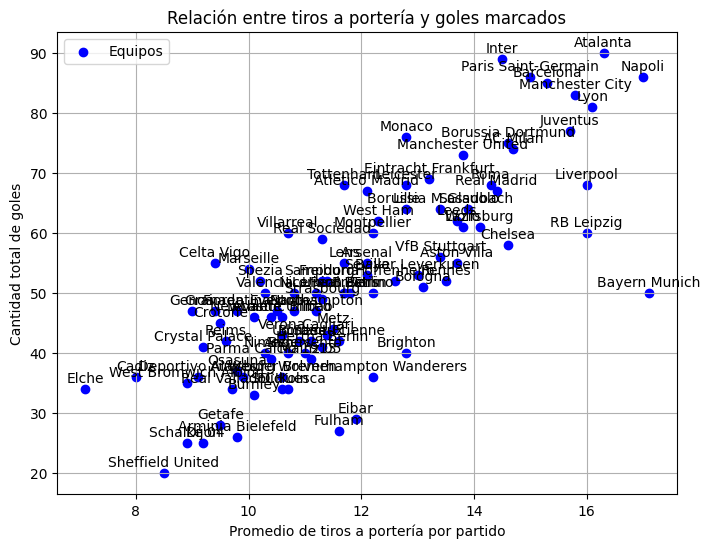

In [ ]:
equipo = edc["equipo"]
tiros_porteria = edc["tiros_porteria"]
goles = edc["goles"]

plt.figure(figsize=(8, 6))
plt.scatter(tiros_porteria, goles, c='b', marker='o', label='Equipos')

plt.xlabel('Promedio de tiros a portería por partido')
plt.ylabel('Cantidad total de goles')

plt.title('Relación entre tiros a portería y goles marcados')

for i, equipo in enumerate(equipo):
    plt.annotate(equipo, (tiros_porteria[i], goles[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.legend()

plt.grid(True)
plt.show()

**Hipótesis 3:**

**Ho:** Los equipos que tuvieron mayor cantidad de tiempo el balón por partido en dicha temporada no necesariamente marcaron mayor cantidad de goles en el torneo.

**H1:** Los equipos con mayor posesión del balón por partido en dicha temporada marcaron mayor cantidad de goles en el torneo.

In [ ]:
edc[["equipo","posesion_%","goles"]]

,equipo,posesion_%,goles
0,Manchester City,60.8,83
1,Bayern Munich,58.1,50
2,Paris Saint-Germain,60.1,86
3,Barcelona,62.4,85
4,Real Madrid,57.7,67
...,...,...,...
93,Sheffield United,43.0,20
94,Crotone,47.2,45
95,Benevento,44.2,40
96,Dijon,46.9,25


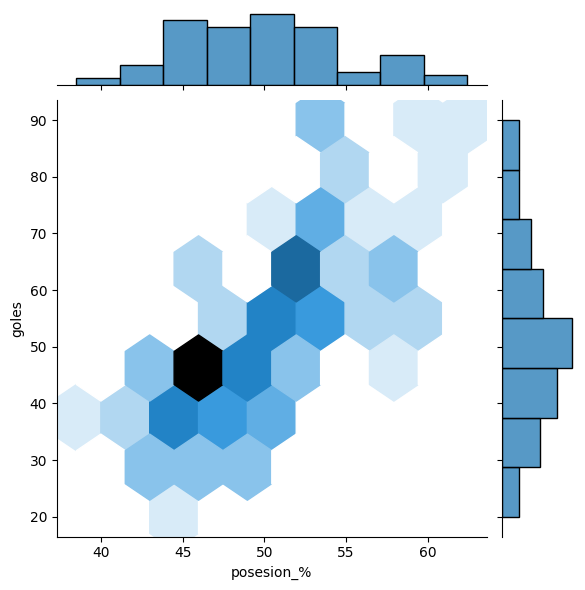

In [196]:
sns.jointplot(data=edc, x='posesion_%', y='goles', kind='hex');

Se corrobora de manera muy clara con este gráfico la relación entre estas dos variables. La mayor cantidad de datos se encuentran concentrados en la intersección cercana a 45% de posesion y 45 goles.

**Hipótesis 4:**

**Ho:** Los clubes que obtuvieron mayor cantidad de tarjetas amarillas y rojas a lo largo de un temporada no necesariamente están peor valorados deportivamente.

**H1:** Los clubes con mejor rating o valoración general han recibido menor cantidad de tarjetas amarillas y tarjetas rojas a lo largo de una temporada.

In [199]:
edc['suma_tarjetas'] = edc['t_amarillas'] + edc['t_rojas']

edc[["equipo","t_amarillas","t_rojas","suma_tarjetas","valor_gral_eq"]]

,equipo,t_amarillas,t_rojas,suma_tarjetas,valor_gral_eq
0,Manchester City,46,2,48,7.01
1,Bayern Munich,63,3,66,6.95
2,Paris Saint-Germain,73,7,80,6.88
3,Barcelona,68,2,70,6.87
4,Real Madrid,57,2,59,6.86
...,...,...,...,...,...
93,Sheffield United,73,3,76,6.46
94,Crotone,85,4,89,6.43
95,Benevento,90,5,95,6.43
96,Dijon,75,5,80,6.42


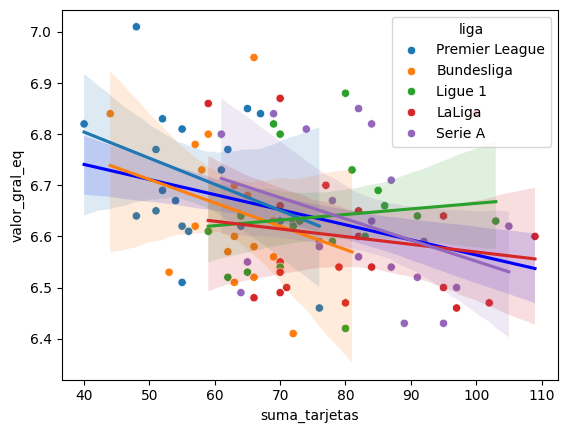

In [200]:
sns.scatterplot(data=edc, x='suma_tarjetas', y='valor_gral_eq',hue='liga');
sns.regplot(x='suma_tarjetas', y='valor_gral_eq', data=edc, scatter=False, color='blue');

for group in edc['liga'].unique():
    sns.regplot(x='suma_tarjetas', y='valor_gral_eq', data=edc[edc['liga'] == group], scatter=False, label=f'Reg: {group}')

El grafico muestra, que excepto la liga francesa, el resto mantiene un comportamiento negativamente proporcional entre ambas variables.

**Hipótesis 5:**

**Ho:** No existe una relación directa entre el valor de mercado promedio de los jugadores de cada equipo y la valoración económica de las ligas.

**H1:** El valor de mercado de los clubes es mayor a medida que aumenta el promedio del valor de mercado de sus jugadores.

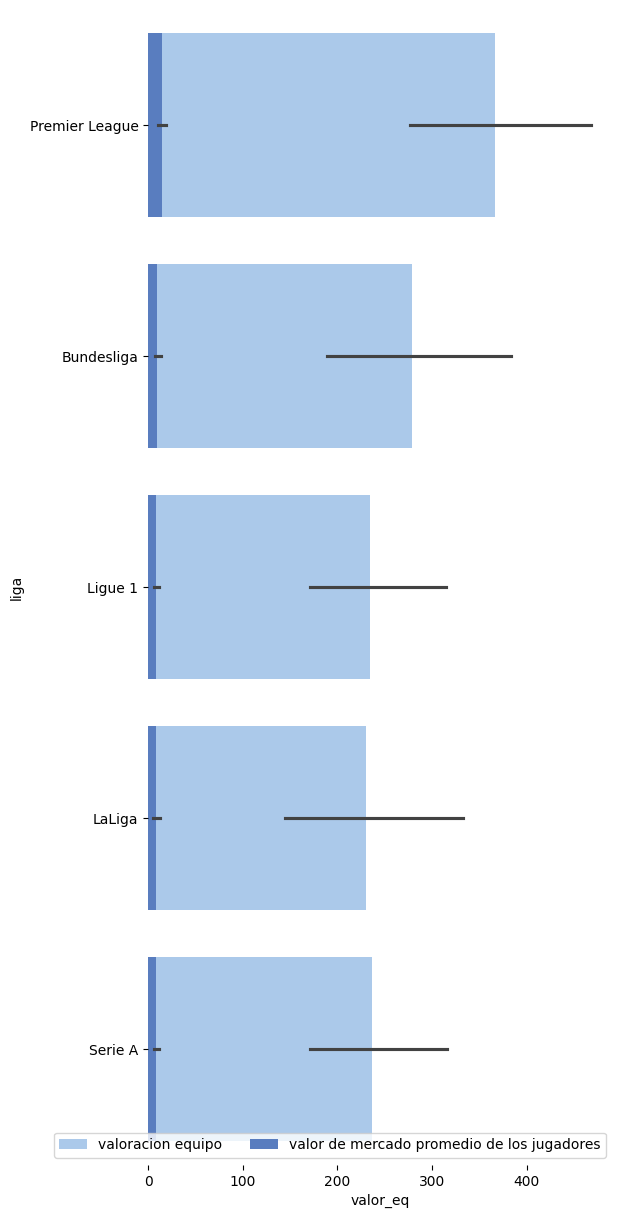

In [ ]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="valor_eq", y=edc["liga"], data=vec,
            label="valoracion equipo", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="valor_med_merc_jug", y=edc["liga"], data=vec,
            label="valor de mercado promedio de los jugadores", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

Como se puede observar en esta gráfica, la Premier League tiene un valor de mercado promedio de los jugadores por encima del resto de las ligas y a su vez cuenta con los quipos con mayor valor de mercado, con lo cual podemos afirmar la hipótesis alternativa.

<h3>6.3 Multivariante<h3>

Genero un DataFrame numérico para ver la correlación entre las variables y lo visualizo mediante heatmap:

In [172]:
dataframe_numerico = edc.iloc[:,2:]
dataframe_numerico

,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
0,83,15.8,46,2,60.8,89.4,12.8,7.01
1,50,17.1,44,3,58.1,85.5,12.9,6.95
2,86,15.0,73,7,60.1,89.5,9.5,6.88
3,85,15.3,68,2,62.4,89.7,10.6,6.87
4,67,14.4,57,2,57.7,87.7,11.8,6.86
...,...,...,...,...,...,...,...,...
93,20,8.5,73,3,43.0,76.9,19.1,6.46
94,45,9.5,85,4,47.2,80.4,12.7,6.43
95,40,11.0,90,5,44.2,77.7,13.4,6.43
96,25,9.2,75,5,46.9,80.0,14.3,6.42


In [173]:
dataframe_numerico.corr()

,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq
goles,1.000000,0.788670,-0.143165,0.003792,0.696951,0.690846,-0.485505,0.816699
tiros_porteria,0.788670,1.000000,-0.369343,-0.105080,0.759153,0.684035,-0.382147,0.851265
t_amarillas,-0.143165,-0.369343,1.000000,0.368847,-0.164302,-0.184238,0.060116,-0.417049
t_rojas,0.003792,-0.105080,0.368847,1.000000,-0.083360,-0.043761,-0.031791,-0.162358
posesion_%,0.696951,0.759153,-0.164302,-0.083360,1.000000,0.851458,-0.543970,0.734978
pases_%,0.690846,0.684035,-0.184238,-0.043761,0.851458,1.000000,-0.764788,0.668573
duelos_aereos_ganados,-0.485505,-0.382147,0.060116,-0.031791,-0.543970,-0.764788,1.000000,-0.327225
valor_gral_eq,0.816699,0.851265,-0.417049,-0.162358,0.734978,0.668573,-0.327225,1.000000


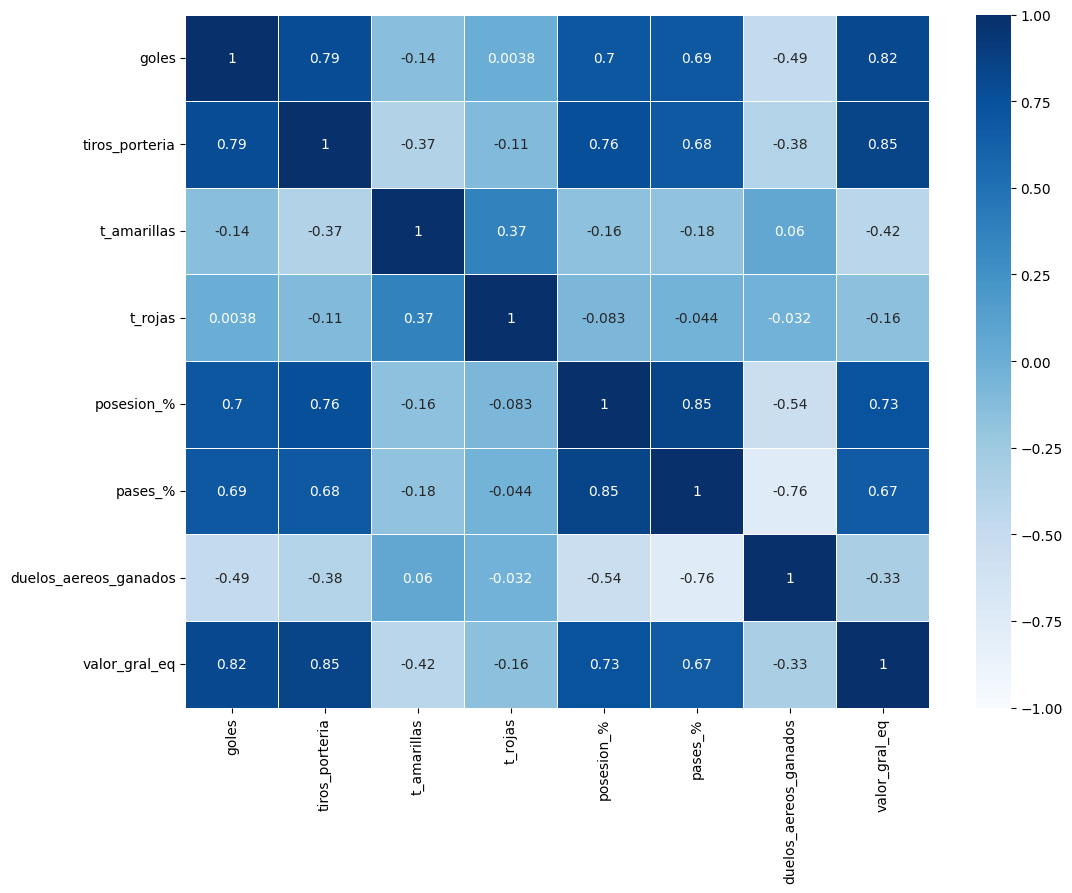

In [174]:
plt.figure(figsize=(12,9))
sns.heatmap(dataframe_numerico.corr(),
           vmin=-1,vmax=1,annot=True,linewidths=0.5,cmap="Blues");

Como se observa en el grafico anterior existe un mayor grado de correlación entre ciertas variables.  
Se podría a priori decir que, aunque no sea la causa, sí existe un comportamiento similar entre los datos  
de "goles" y "tiros_porteria" (ambos 0.85) con la variable "valor_gral_eq"; y en menor medida, "posesion_%" (0.73) y "pases_%" (0.67) con la misma variable "valor_gral_eq".
Las restantes columnas ("t_amarillas", "t_rojas" y "duelos_aereos_ganados") tienen un grado de correlacion  muy bajo.

Corroboro si los equipos del DataSet "edc" coinciden con los equipos del DataSet "vec", para realizar el MERGE por la columna "equipo".

In [175]:
columnas_equipo = edc['equipo'].isin(vec['equipo'])
print(columnas_equipo)

# la máscara booleana me muestra con True aquellos que sí estan en ambas columnas.

0      True
1      True
2      True
3      True
4      True
      ...  
93     True
94    False
95    False
96    False
97    False
Name: equipo, Length: 98, dtype: bool


¿Cuántos equipos coinciden?

In [176]:
'''
El 67% de los equipos están en ambas columnas, considero una muestra representativa para realizar un merge.
'''

conteo = columnas_equipo.value_counts()/len(columnas_equipo)*100.
print(conteo)

equipo
True     67.346939
False    32.653061
Name: count, dtype: float64


In [177]:
merge_edc_vec = pd.merge(edc, vec, left_on='equipo', right_on='equipo', how='inner')
merge_edc_vec

,equipo,liga_x,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq,liga_y,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug,Market Value Of Top 18 Players In Millions(£)
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01,Premier League,24,27.1,970.02,40.42,920.70
1,Bayern Munich,Bundesliga,50,17.1,44,3,58.1,85.5,12.9,6.95,BundesligBayern Munich,26,26.1,756.45,29.09,726.21
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88,Ligue 1,36,26.1,891.18,24.76,801.00
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87,LaLiga,30,25.9,592.20,19.74,535.50
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86,LaLiga,27,27.3,680.40,25.20,610.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Genoa,Serie A,47,9.0,85,2,46.1,79.7,13.7,6.54,Serie A,34,27.6,86.94,2.56,72.27
62,Fiorentina,Serie A,47,9.8,86,5,46.8,81.0,14.2,6.52,Serie A,26,27.0,228.42,8.79,214.02
63,Levante,LaLiga,46,10.1,70,1,51.5,80.1,12.2,6.50,LaLiga,27,28.1,89.19,3.30,82.35
64,Getafe,LaLiga,28,9.5,117,7,44.4,66.5,22.8,6.49,LaLiga,25,27.3,141.30,5.65,135.45


In [ ]:
general_data = merge_edc_vec.drop(columns=["equipo","liga_x","liga_y","Market Value Of Top 18 Players In Millions(£)"])
general_data

,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug
0,83,15.8,46,2,60.8,89.4,12.8,7.01,24,27.1,970.02,40.42
1,50,17.1,44,3,58.1,85.5,12.9,6.95,26,26.1,756.45,29.09
2,86,15.0,73,7,60.1,89.5,9.5,6.88,36,26.1,891.18,24.76
3,85,15.3,68,2,62.4,89.7,10.6,6.87,30,25.9,592.20,19.74
4,67,14.4,57,2,57.7,87.7,11.8,6.86,27,27.3,680.40,25.20
...,...,...,...,...,...,...,...,...,...,...,...,...
61,47,9.0,85,2,46.1,79.7,13.7,6.54,34,27.6,86.94,2.56
62,47,9.8,86,5,46.8,81.0,14.2,6.52,26,27.0,228.42,8.79
63,46,10.1,70,1,51.5,80.1,12.2,6.50,27,28.1,89.19,3.30
64,28,9.5,117,7,44.4,66.5,22.8,6.49,25,27.3,141.30,5.65


In [ ]:
# corroboro que en este nuevo DataFrame generado a partir del merge realizado no se hayan generado Nulos.

general_data.isnull().sum()

goles                    0
tiros_porteria           0
t_amarillas              0
t_rojas                  0
posesion_%               0
pases_%                  0
duelos_aereos_ganados    0
valor_gral_eq            0
tamaño_plantilla         0
edad_media_jug           0
valor_eq                 0
valor_med_merc_jug       0
dtype: int64

In [ ]:
general_data.corr()

,goles,tiros_porteria,t_amarillas,t_rojas,posesion_%,pases_%,duelos_aereos_ganados,valor_gral_eq,tamaño_plantilla,edad_media_jug,valor_eq,valor_med_merc_jug
goles,1.000000,0.758084,-0.123963,0.038519,0.654856,0.679592,-0.521636,0.771551,0.166518,-0.080303,0.637584,0.591209
tiros_porteria,0.758084,1.000000,-0.371960,-0.019115,0.722186,0.676294,-0.466143,0.820303,0.206690,-0.182928,0.657917,0.611623
t_amarillas,-0.123963,-0.371960,1.000000,0.360572,-0.198864,-0.235901,0.137819,-0.430396,0.044452,0.097312,-0.368966,-0.364077
t_rojas,0.038519,-0.019115,0.360572,1.000000,-0.014186,0.057469,-0.122293,-0.127058,0.150064,-0.130184,-0.116475,-0.153952
posesion_%,0.654856,0.722186,-0.198864,-0.014186,1.000000,0.829001,-0.619714,0.686382,0.187408,-0.257566,0.684367,0.632968
pases_%,0.679592,0.676294,-0.235901,0.057469,0.829001,1.000000,-0.819910,0.641960,0.216084,-0.125324,0.656817,0.612325
duelos_aereos_ganados,-0.521636,-0.466143,0.137819,-0.122293,-0.619714,-0.819910,1.000000,-0.368546,-0.256483,0.163305,-0.433942,-0.381342
valor_gral_eq,0.771551,0.820303,-0.430396,-0.127058,0.686382,0.641960,-0.368546,1.000000,-0.009411,-0.078157,0.842047,0.829701
tamaño_plantilla,0.166518,0.206690,0.044452,0.150064,0.187408,0.216084,-0.256483,-0.009411,1.000000,-0.345574,-0.034016,-0.195935
edad_media_jug,-0.080303,-0.182928,0.097312,-0.130184,-0.257566,-0.125324,0.163305,-0.078157,-0.345574,1.000000,0.053586,0.102828


***A modo de CONCLUSION esta gráfica permite AFIRMAR en gran medida la HIPOTESIS PRINCIPAL.***  

***Se observa un alto grado de correlación (0.842047) entre la valoración deportiva y económica de los clubes de las ligas más importantes de Europa.***